In [27]:
import os
import pickle
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [28]:
input_directory = '/content/drive/MyDrive/Colab Notebooks/IP/Project/ModelsExport/Classification/'

classification_models=[]
classification_model_names = []
for file_name in os.listdir(input_directory):
  file_path = os.path.join(input_directory, file_name)
  with open(file_path, 'rb') as f:
    classification_models.append(pickle.load(f))
    classification_model_names.append(file_name[:-4])

In [29]:
classification_models

[RandomForestClassifier(),
 DecisionTreeClassifier(criterion='log_loss', max_depth=10, max_features='log2'),
 RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2),
 CategoricalNB(force_alpha=True),
 BernoulliNB(force_alpha=True)]

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP/Project/jsbach_chorals_harmony.data')
df.head()


,Choral ID,Event number,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Chord label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M


In [31]:
X_test = df.drop(['Chord label', 'Choral ID', 'Event number'],axis=1)
y_test = df['Chord label']

X_test

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter
0,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
1,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5
2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2
3,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4
5661,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3
5662,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5
5663,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3


In [32]:
oe = OrdinalEncoder()
X_TEST = oe.fit_transform(X_test)
X_TEST

array([[ 1.,  0.,  0., ...,  0., 12.,  2.],
       [ 1.,  0.,  0., ...,  0., 10.,  4.],
       [ 1.,  0.,  0., ...,  0., 10.,  1.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  5.,  4.],
       [ 1.,  0.,  0., ...,  0.,  5.,  2.],
       [ 0.,  0.,  0., ...,  0., 12.,  3.]])

In [33]:
def plot_score_comparison(score, average=None):
  model_names = classification_model_names

  plt.figure(figsize=(15,5))

  for model, model_name in zip(classification_models, model_names):
    y_test_pred = model.predict(X_TEST)
    if (average is not None):
      score_value = score(y_test, y_test_pred, average=average, zero_division=1)
    else: 
      score_value = score(y_test, y_test_pred)
    bar = plt.bar(model_name, score_value)
    height = bar[0].get_height()
    plt.text(bar[0].get_x() + bar[0].get_width() / 2.0, height, f'{score_value:.4f}', ha='center', va='bottom')
    plt.title(score.__name__, fontdict={'fontsize': 15, 'fontweight' :'bold'})

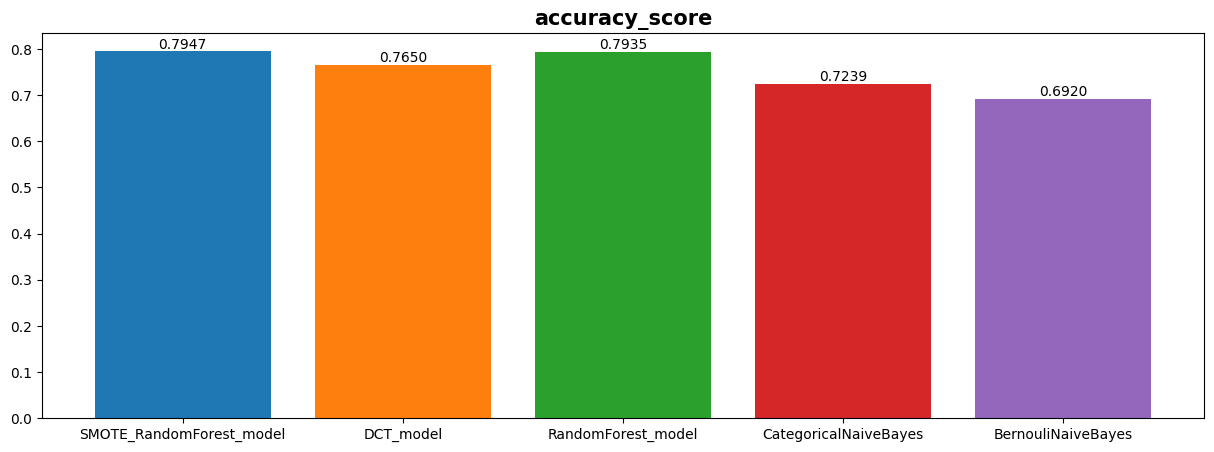

In [34]:
plot_score_comparison(accuracy_score)

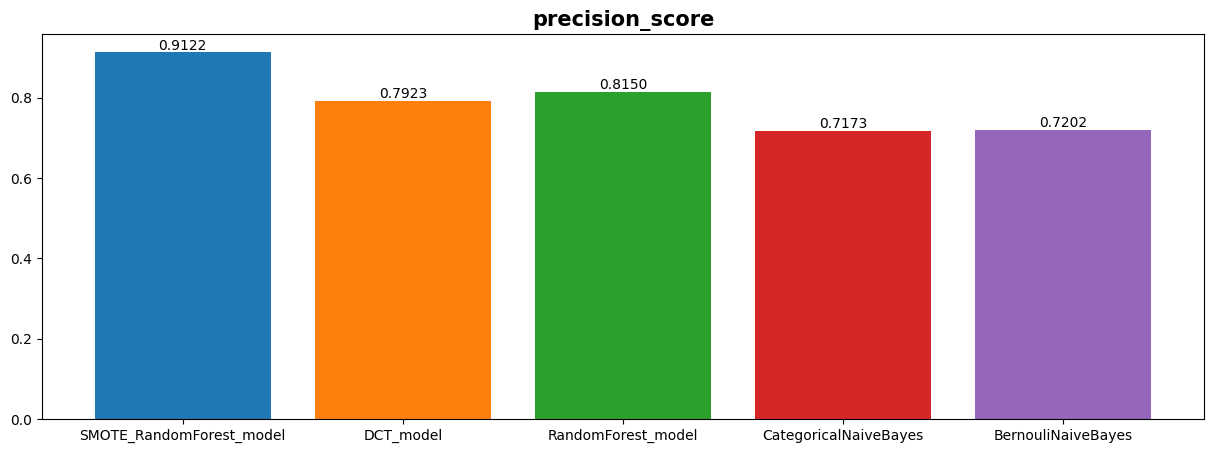

In [35]:
plot_score_comparison(precision_score, 'macro')

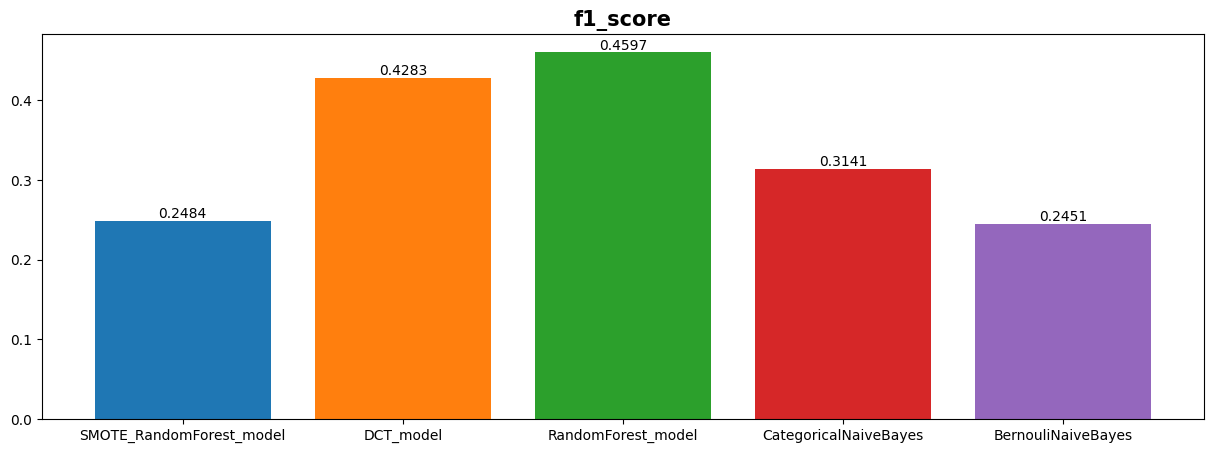

In [36]:
plot_score_comparison(f1_score, 'macro')

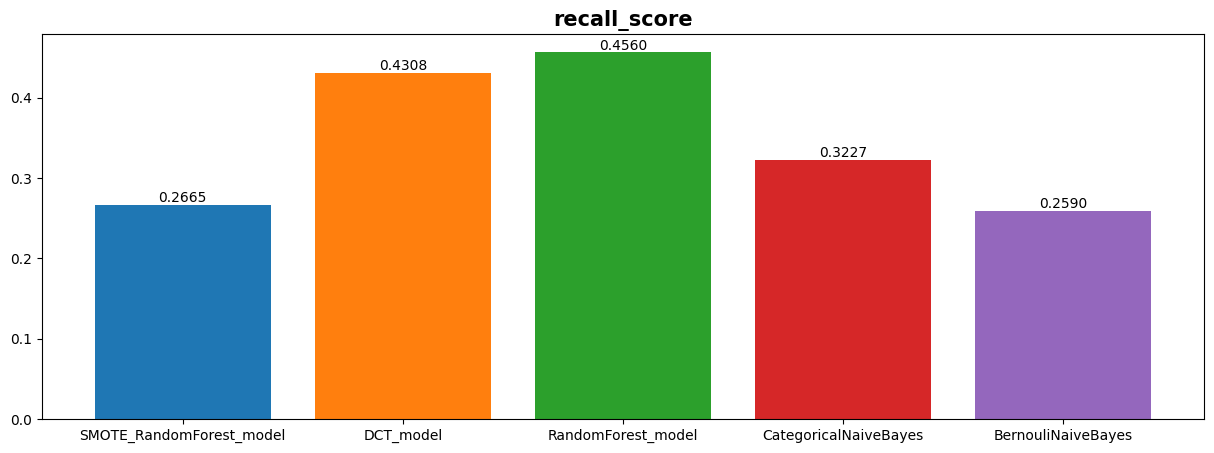

In [37]:
plot_score_comparison(recall_score, 'macro')